# Eksploratory Data Analysis Nilai Tukar Petani 2020

## Penjelasan

Proyek ini terdapat data yang berasal dari Badan Pusat Statistik (BPS https://www.bps.go.id/), pada data ini memuat nilai tukar petani (NTP).

NTP sendiri merupakan indikator proxy kesejahteraan petani. NTP didapat dari perbandingan antara Indeks harga yg diterima petani (It) dengan Indeks harga yg dibayar petani (Ib).

NTP sendiri mempunyai arti yaitu sebegai berikut:

1. NTP > 100, berarti petani mengalami surplus. Harga produksi naik lebih besar dari kenaikan harga konsumsinya. Pendapatan petani naik lebih besar dari pengeluarannya.

2. NTP = 100, berarti petani mengalami impas. Kenaikan/penurunan harga produksinya sama dengan persentase kenaikan/penurunan harga barang konsumsi. Pendapatan petani sama dengan pengeluarannya.

3. NTP < 100, berarti petani mengalami defisit. Kenaikan harga produksi relatif lebih kecil dibandingkan dengan kenaikan harga barang konsumsinya. Pendapatan petani turun, lebih kecil dari pengeluarannya.

Dari hasil Eploratory Data Analysis (EDA) diharapkan dapat menjadi sumber insight dalam pemberdayaan sektor pertanian.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale
from locale import atof
import numpy as np
import re
locale.setlocale(locale.LC_NUMERIC, '')

'id_ID.UTF-8'

In [2]:
data = pd.read_csv("data/NTP_2020.csv")

In [3]:
data.head()

,Provinsi,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Kelompok
0,ACEH,"101,09","99,20","98,78","98,52","97,24","99,07","97,85","98,60","98,88","98,52","99,12","98,01","98,74",Petani
1,SUMATERA UTARA,"113,69","111,71","109,41","106,41","104,50","105,13","106,84","108,53","110,44","112,01","114,00","115,21","109,83",Petani
2,SUMATERA BARAT,"103,40","102,63","101,74","99,62","97,73","97,98","98,39","99,41","100,54","100,94","101,95","102,68","100,59",Petani
3,RIAU,"123,93","117,90","113,76","115,64","111,74","109,66","113,57","116,88","120,94","123,61","127,32","130,34","118,79",Petani
4,JAMBI,"110,47","107,07","104,85","102,16","98,55","101,15","103,57","106,89","110,28","112,68","115,75","117,83","107,62",Petani


In [4]:
data = data.replace('-',np.nan)
data = data.replace(np.nan, 0)

In [5]:
# melihat atribut yang ada pada table

print("Kelompok ",data["Kelompok"].unique())
print("Provinsi ",data["Provinsi"].unique())

Kelompok  ['Petani' 'Petani Tanaman Pangan' 'Petani Hortikultura'
 'Petani Tanaman Perkebunan' 'Petani Peternakan' 'Nelayan'
 'Pembudidayaan Ikan' 'Nelayan dan Pembudidayaan Ikan']
Provinsi  ['ACEH' 'SUMATERA UTARA' 'SUMATERA BARAT' 'RIAU' 'JAMBI'
 'SUMATERA SELATAN' 'BENGKULU' 'LAMPUNG' 'KEP. BANGKA BELITUNG'
 'KEP. RIAU' 'DKI JAKARTA' 'JAWA BARAT' 'JAWA TENGAH' 'DI YOGYAKARTA'
 'JAWA TIMUR' 'BANTEN' 'BALI' 'NUSA TENGGARA BARAT' 'NUSA TENGGARA TIMUR'
 'KALIMANTAN BARAT' 'KALIMANTAN TENGAH' 'KALIMANTAN SELATAN'
 'KALIMANTAN TIMUR' 'KALIMANTAN UTARA' 'SULAWESI UTARA' 'SULAWESI TENGAH'
 'SULAWESI SELATAN' 'SULAWESI TENGGARA' 'GORONTALO' 'SULAWESI BARAT'
 'MALUKU' 'MALUKU UTARA' 'PAPUA BARAT' 'PAPUA' 'INDONESIA']


In [6]:
# pengkelompokan berdasarkan jenis usaha

dfPangan = data[data["Kelompok"]=="Petani Tanaman Pangan"].drop(columns = "Kelompok").set_index('Provinsi').apply(lambda x: x.str.replace(',','.')).astype(float).replace(np.nan, 0)
dfHortikultura  = data[data["Kelompok"]=="Petani Hortikultura"].drop(columns = "Kelompok").set_index('Provinsi').apply(lambda x: x.str.replace(',','.')).astype(float).replace(np.nan, 0)
dfKebun = data[data["Kelompok"]=="Petani Tanaman Perkebunan"].drop(columns = "Kelompok").set_index('Provinsi').apply(lambda x: x.str.replace(',','.')).astype(float).replace(np.nan, 0)
dfPeternakan = data[data["Kelompok"]=="Petani Peternakan"].drop(columns = "Kelompok").set_index('Provinsi').apply(lambda x: x.str.replace(',','.')).astype(float).replace(np.nan, 0)
dfNelayan = data[data["Kelompok"]=="Nelayan"].drop(columns = "Kelompok").set_index('Provinsi').apply(lambda x: x.str.replace(',','.')).astype(float).replace(np.nan, 0)
dfBudIkan = data[data["Kelompok"]=="Pembudidayaan Ikan"].drop(columns = "Kelompok").set_index('Provinsi').apply(lambda x: x.str.replace(',','.')).astype(float).replace(np.nan, 0)
dfNelayandanBudidaya = data[data["Kelompok"]=="Nelayan dan Pembudidayaan Ikan"].drop(columns = "Kelompok").set_index('Provinsi').apply(lambda x: x.str.replace(',','.')).astype(float).replace(np.nan, 0)

In [7]:
# ambil data berdasarkan provinsi

dfPProv = dfPangan.drop(index='INDONESIA')
dfHProv = dfHortikultura.drop(index='INDONESIA')
dfKprov = dfKebun.drop(index='INDONESIA')
dfTProv = dfPeternakan.drop(index='INDONESIA')
dfNProv = dfNelayan.drop(index='INDONESIA')
dfIProv = dfBudIkan.drop(index='INDONESIA')
dfNBProv = dfNelayandanBudidaya.drop(index='INDONESIA')

### NTP Wilayah Tertinggi  Berdasarkan Kelompok Pertanian

In [31]:
d = {'Kelompok': ['Tani Pangan', 'Tani Hortikultura', 'Perkebunan', 'Peternakan', 'Nelayan', 'Budidaya Ikan', 'Nelayan dan Pembudidayaan Ikan'], 
     'Provinsi': [dfPangan[dfPangan["Tahunan"]==dfPangan["Tahunan"].max()]["Tahunan"].index[0], 
                  dfHortikultura[dfHortikultura["Tahunan"]==dfHortikultura["Tahunan"].max()]["Tahunan"].index[0],
                  dfKebun[dfKebun["Tahunan"]==dfKebun["Tahunan"].max()]["Tahunan"].index[0],
                  dfPeternakan[dfPeternakan["Tahunan"]==dfPeternakan["Tahunan"].max()]["Tahunan"].index[0],
                  dfNelayan[dfNelayan["Tahunan"]==dfNelayan["Tahunan"].max()]["Tahunan"].index[0],
                  dfBudIkan[dfBudIkan["Tahunan"]==dfBudIkan["Tahunan"].max()]["Tahunan"].index[0],
                  dfNelayandanBudidaya[dfNelayandanBudidaya["Tahunan"]==dfNelayandanBudidaya["Tahunan"].max()]["Tahunan"].index[0]],
    'Nilai': [dfPangan[dfPangan["Tahunan"]==dfPangan["Tahunan"].max()]["Tahunan"].values[0], 
                  dfHortikultura[dfHortikultura["Tahunan"]==dfHortikultura["Tahunan"].max()]["Tahunan"].values[0],
                  dfKebun[dfKebun["Tahunan"]==dfKebun["Tahunan"].max()]["Tahunan"].values[0],
                  dfPeternakan[dfPeternakan["Tahunan"]==dfPeternakan["Tahunan"].max()]["Tahunan"].values[0],
                  dfNelayan[dfNelayan["Tahunan"]==dfNelayan["Tahunan"].max()]["Tahunan"].values[0],
                  dfBudIkan[dfBudIkan["Tahunan"]==dfBudIkan["Tahunan"].max()]["Tahunan"].values[0],
                  dfNelayandanBudidaya[dfNelayandanBudidaya["Tahunan"]==dfNelayandanBudidaya["Tahunan"].max()]["Tahunan"].values[0]]
    }
dfNTPMax = pd.DataFrame(data=d)

In [30]:
dfNTPMax

,Kelompok,Provinsi,Nilai
0,Tani Pangan,NUSA TENGGARA BARAT,108.59
1,Tani Hortikultura,SULAWESI BARAT,109.98
2,Perkebunan,SUMATERA UTARA,125.05
3,Peternakan,PAPUA,108.34
4,Nelayan,PAPUA,110.52
5,Budidaya Ikan,JAWA TENGAH,108.51
6,Nelayan dan Pembudidayaan Ikan,PAPUA,110.04


## EDA Bagian Kelompok Petani Pangan

In [33]:
print("======================== Statistik Deskriptif Kelompok Petani Pangan Seluruh Provinsi ========================")
dfPProv.drop(columns="Tahunan").describe()

======================== Statistik Deskriptif Kelompok Petani Pangan Seluruh Provinsi ========================


,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,98.142059,97.966176,97.567059,97.174118,96.690294,96.413824,96.471471,96.838824,97.114118,97.015882,96.616765,96.275588
std,17.769204,17.741443,17.699880,17.466242,17.373776,17.309957,17.341319,17.450627,17.485843,17.546963,17.494098,17.461097
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,97.750000,97.822500,96.882500,96.842500,97.115000,97.315000,96.477500,97.247500,97.330000,97.075000,96.957500,96.767500
50%,100.835000,100.545000,101.095000,99.965000,99.505000,99.125000,99.265000,99.440000,99.775000,99.835000,99.300000,98.550000
75%,103.267500,103.997500,102.855000,102.392500,101.712500,101.410000,101.370000,101.607500,102.365000,102.545000,101.760000,101.527500
max,108.670000,109.330000,109.160000,106.250000,106.080000,105.830000,106.600000,108.260000,108.720000,110.930000,111.760000,111.510000


In [34]:
nasional = dfPangan.reset_index()
nasional = nasional[nasional["Provinsi"]=="INDONESIA"].drop(columns = "Tahunan").set_index('Provinsi').T['INDONESIA']

### Rata - Rata Nasional Setiap Bulan

In [35]:
nasional

Januari      104.21
Februari     103.76
Maret        102.41
April        100.93
Mei          100.38
Juni         100.42
Juli         100.17
Agustus      100.63
September    101.53
Oktober      101.43
November     100.89
Desember     100.34
Name: INDONESIA, dtype: float64

In [36]:
# Deskripsi dalam setahun secara nasional
nasional.describe()

count     12.00000
mean     101.42500
std        1.35537
min      100.17000
25%      100.41000
50%      100.91000
75%      101.75000
max      104.21000
Name: INDONESIA, dtype: float64

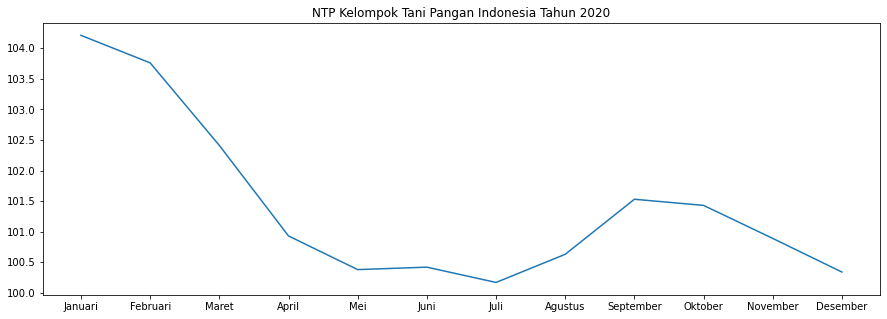

In [37]:
# membuat grafik garis dengan nilai diambil dari kelompok tani secara nasional
plt.figure(figsize=(15,5))
plt.title('NTP Kelompok Tani Pangan Indonesia Tahun 2020')
plt.plot(nasional.index, nasional.values)

In [38]:
myData = data[data["Provinsi"]=="INDONESIA"].drop(["Tahunan", "Provinsi"], axis=1).set_index("Kelompok").T

In [43]:
myData

Kelompok,Petani,Petani Tanaman Pangan,Petani Hortikultura,Petani Tanaman Perkebunan,Petani Peternakan,Nelayan,Pembudidayaan Ikan,Nelayan dan Pembudidayaan Ikan
Januari,"104,16","104,21","105,17","107,43","98,06","101,11","101,62","101,31"
Februari,"103,35","103,76","104,32","105,40","98,23","100,31","101,17","100,65"
Maret,"102,09","102,41","103,50","103,39","98,12","100,05","100,67","100,30"
April,"100,32","100,93","102,28","100,82","96,40","98,49","99,02","98,70"
Mei,"99,47","100,38","101,68","98,51","96,66","98,69","99,76","99,11"
Juni,"99,60","100,42","100,51","98,47","98,29","99,22","99,88","99,48"
Juli,"100,09","100,17","99,77","100,19","99,94","100,01","100,40","100,17"
Agustus,"100,65","100,63","97,80","103,01","98,64","100,38","100,59","100,47"
September,"101,66","101,53","97,38","105,76","98,01","100,72","100,51","100,65"
Oktober,"102,25","101,43","99,42","107,58","97,75","100,73","101,09","100,89"


In [39]:
tamp = myData.apply(lambda x: x.str.replace(',','.')).astype(float).replace(np.nan, 0).rename(columns=lambda x: re.sub(' ','_',x))

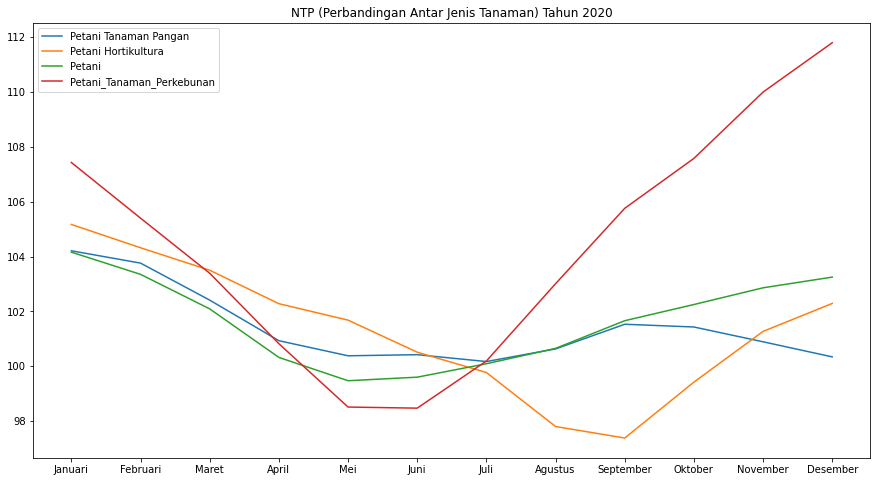

In [41]:
# Grafik Jenis Usaha Pertanian / Perkebunan

plt.figure(figsize=(15,8))
plt.title('NTP (Perbandingan Antar Jenis Tanaman) Tahun 2020')
plt.plot(tamp.index, tamp["Petani_Tanaman_Pangan"], label = "Petani Tanaman Pangan")
plt.plot(tamp.index, tamp["Petani_Hortikultura"], label = "Petani Hortikultura")
plt.plot(tamp.index, tamp["Petani"], label = "Petani")
plt.plot(tamp.index, tamp["Petani_Tanaman_Perkebunan"], label = "Petani_Tanaman_Perkebunan")
plt.legend()

In [42]:
tamp.describe()

Kelompok,Petani,Petani_Tanaman_Pangan,Petani_Hortikultura,Petani_Tanaman_Perkebunan,Petani_Peternakan,Nelayan,Pembudidayaan_Ikan,Nelayan_dan_Pembudidayaan_Ikan
count,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000
mean,101.645833,101.42500,101.282500,104.363333,98.095000,100.223333,100.55000,100.359167
std,1.593312,1.35537,2.433389,4.385891,0.917452,1.021294,0.72369,0.883973
min,99.470000,100.17000,97.380000,98.470000,96.400000,98.490000,99.02000,98.700000
25%,100.262500,100.41000,99.682500,100.662500,97.945000,99.812500,100.27000,99.997500
50%,101.875000,100.91000,101.475000,104.395000,98.175000,100.345000,100.62000,100.560000
75%,102.957500,101.75000,102.592500,107.467500,98.400000,100.790000,101.11000,100.867500
max,104.160000,104.21000,105.170000,111.800000,99.940000,102.000000,101.62000,101.720000


In [ ]:
# Grafik Usaha Jenis Peternakan

plt.figure(figsize=(15,8))
plt.title('NTP (Jenis Hewan) Tahun 2020')
plt.plot(tamp.index, tamp["Petani_Peternakan"], label = "Petani Peternakan")
plt.plot(tamp.index, tamp["Nelayan"], label = "Nelayan")
plt.plot(tamp.index, tamp["Pembudidayaan_Ikan"], label = "Pembudidayaan Ikan")
plt.legend()

In [ ]:
dfPProv = dfPProv.reset_index()
dfPProv["Tahunan"].describe()

In [ ]:
print("Daerah yang memiliki NTP tertinggi")
dfPProv[dfPProv["Tahunan"]==dfPProv["Tahunan"].max()]

In [ ]:
ab = dfPProv[dfPProv["Tahunan"]==dfPProv["Tahunan"].max()].drop(columns = "Tahunan").set_index('Provinsi').T['NUSA TENGGARA BARAT']
plt.figure(figsize=(15,5))
plt.title('NTP NUSA TENGGARA BARAT Tahun 2020')
plt.plot(ab.index, ab.values)

In [ ]:
print("Daerah yang memiliki NTP terendah")
dfPProv[dfPProv["Tahunan"]==dfPProv["Tahunan"].min()]

In [ ]:
print("========== Daftar Provinsi yang memiliki NTP di atas 100 ==========")
dfPProv[dfPProv["Tahunan"] > 100].sort_values(by=["Tahunan"], ascending=False)

In [ ]:
dfPProv[dfPProv["Tahunan"] > 100].sort_values(by=["Tahunan"], ascending=False)[['Provinsi','Tahunan']].set_index("Provinsi").plot(kind='bar', title ="NTP > 100", figsize=(10, 5), legend=True, fontsize=12)

In [ ]:
print("========== Daftar Provinsi yang memiliki NTP kisaran angka 100 ==========")
dfPProv[(dfPProv["Tahunan"] >99.9)&(dfPProv["Tahunan"] < 101)].sort_values(by=["Tahunan"], ascending=False)

In [ ]:
print("========== Daftar Provinsi yang memiliki NTP di bawah 100 ==========")
dfPProv[dfPProv["Tahunan"] < 100].sort_values(by=["Tahunan"], ascending=False)

In [ ]:
dfPangan.T.INDONESIA

In [ ]:
# convert to csv (optional)
#dfPProv["Tahunan"].to_csv('dfPProv.csv')
data[data["Provinsi"]=="INDONESIA"].drop(["Tahunan", "Provinsi"], axis=1).set_index("Kelompok").T.to_csv("dfNasionalNTP.csv")